MINIEJERCICIO: Partiendo de varios dataset, aplica los diferentes métodos de evaluación de modelo definidas en el apartado (Modelos de regresión) e interpreta los resultados según las indicaciones.

### 2. Dataset CALIFORNIA HOUSING de Scikit-learn (Poco adecuado)

🎯 ****Objetivo: Predecir el precio de una vivienda usando una característica relevante (RM: número medio de habitaciones por vivienda).

1. Carga el dataset
2. Prepara los datos (seleccionando una sola variable para regresión simple)
3. Entrena un modelo de regresión lineal
4. Visualiza la relación entre la variable y el precio
5. Permite hacer predicciones con nuevas características

📈 Ejemplo de regresión simple: ¿Cómo influye la media de ingresos de una zona (`MedInc`) en el precio de la vivienda (`MedHouseVal`)?

Error MAE: 0.89 (puntos de progresión)
R²: 0.01
RMSE: 1.14
MAPE: 61.55%
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     425.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.47e-93
Time:                        20:35:43   Log-Likelihood:                -25616.
No. Observations:               16512   AIC:                         5.124e+04
Df Residuals:                   16510   BIC:                         5.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

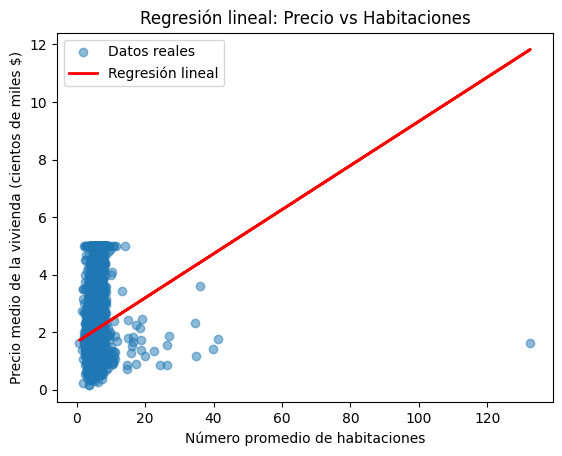

Predicción: Una casa con 5 habitaciones tiene un precio estimado de 2.04 cientos de miles de dólares.


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import statsmodels.api as sm

# Cargar el dataset de California Housing
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
# Variable objetivo (precio de la vivienda)
df["MedHouseVal"] = california.target

# Seleccionar una variable para regresión simple (por ejemplo, la media de habitaciones)
X = df[['AveRooms']]  # Feature: Número promedio de habitaciones
y = df['MedHouseVal']  # Target: Precio medio de la vivienda

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")
# Calculamos el Coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

# Representar la relación entre la variable y el precio
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión lineal")
plt.xlabel("Número promedio de habitaciones")
plt.ylabel("Precio medio de la vivienda (cientos de miles $)")
plt.title("Regresión lineal: Precio vs Habitaciones")
plt.legend()
plt.show()

# Función para hacer predicciones con nuevas viviendas


def predecir_precio(habitaciones):
    prediccion = modelo.predict([[habitaciones]])[0]
    print(
        f"Predicción: Una casa con {habitaciones} habitaciones tiene un precio estimado de {prediccion:.2f} cientos de miles de dólares.")


# Probar con un ejemplo nuevo
predecir_precio(5)  # Cambia este valor para probar

3. Dataset DIABETES de Scikit-learn (Poco adecuado)
- 🎯 Objetivo: Predecir el nivel de progresión de la diabetes (`target`) en función de factores médicos.
    1. Carga el dataset
    2. Prepara los datos (seleccionando `bmi`como variable independiente)
    3. Entrena un modelo de regresión lineal
    4. Visualiza la relación entre `bmi` y la progresión de la diabetes
    5. Permite hacer predicciones con nuevos valores de `bmi`
- 📈 Ejemplo de regresión simple: ¿Cómo influye el índice de masa corporal (`bmi`) en la progresión de la diabetes?<br>

Error MAE: 52.26 (puntos de progresión)
R²: 0.23
RMSE: 63.73
MAPE: 45.88%
                            OLS Regression Results                            
Dep. Variable:            Progression   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     202.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.40e-36
Time:                        20:35:43   Log-Likelihood:                -1958.2
No. Observations:                 353   AIC:                             3920.
Df Residuals:                     351   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

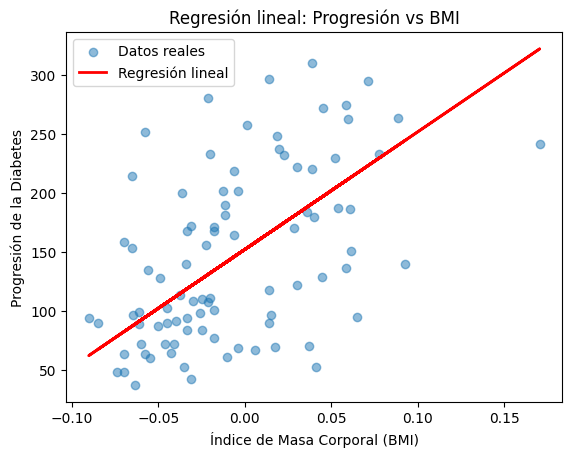

Predicción: Una persona con BMI=0.05 tiene una progresión estimada de 201.93 puntos.


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import statsmodels.api as sm


# Cargar el dataset de Diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# Variable objetivo (progresión de la diabetes)
df["Progression"] = diabetes.target

# Seleccionar una variable para regresión simple (Índice de Masa Corporal - BMI)
X = df[['bmi']]  # Feature: Índice de Masa Corporal
y = df['Progression']  # Target: Nivel de progresión de la diabetes

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")
# Calculamos el Coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

# Representar la relación entre BMI y la progresión de la diabetes
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión lineal")
plt.xlabel("Índice de Masa Corporal (BMI)")
plt.ylabel("Progresión de la Diabetes")
plt.title("Regresión lineal: Progresión vs BMI")
plt.legend()
plt.show()

# Función para hacer predicciones con nuevos valores de BMI


def predecir_progresion(bmi):
    prediccion = modelo.predict([[bmi]])[0]
    print(
        f"Predicción: Una persona con BMI={bmi:.2f} tiene una progresión estimada de {prediccion:.2f} puntos.")


# Probar con un ejemplo nuevo
predecir_progresion(0.05)  # Cambia este valor para probar

### 4. Dataset TIPS de Seaborn (Poco adecuado)

- 🔍 Objetivo: Relación entre la propina (`tip`) y el total de la cuenta (`total_bill`).
    1. Carga de datos
    2. Visualización inicial
    3. Entrenamiento del modelo
    4. Evaluación con MAE y R²
    5. Predicción con un nuevo valor
    6. Representación gráfica
- 📈 Ejemplo de regresión simple: ¿Cómo influye el total de la cuenta en la propina?

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Error MAE: 0.62 (puntos de progresión)
R²: 0.54
RMSE: 0.75
MAPE: 26.40%
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     146.2
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.04e-25
Time:                        20:35:44   Log-Likelihood:                -290.84
No. Observations:                 195   AIC:                             585.7
Df Residuals:                     193   BIC:       

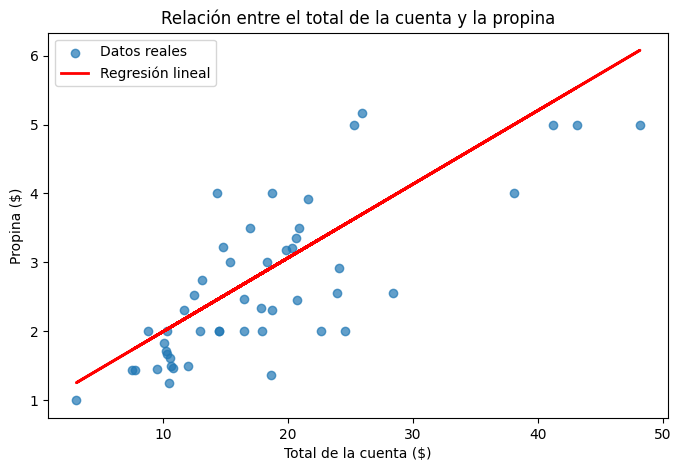

Propina estimada para una cuenta de $50: 6.27 dólares


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [233]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Cargar el dataset
tips = sns.load_dataset("tips")

# Visualizar los primeros datos
print(tips.head())

# Seleccionar las variables
X = tips[['total_bill']]  # Variable independiente (entrada)
y = tips['tip']           # Variable dependiente (objetivo)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")
# Calculamos el Coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

print(f"MAE (Error Absoluto Medio): {mae:.2f} dólares")
print(f"R² (Coeficiente de determinación): {r2:.2f}")

# Representación gráfica
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regresión lineal")
plt.xlabel("Total de la cuenta ($)")
plt.ylabel("Propina ($)")
plt.title("Relación entre el total de la cuenta y la propina")
plt.legend()
plt.show()

# Predicción con un nuevo valor
nueva_cuenta = np.array([[50]])  # Ejemplo: cuenta de $50
propina_predicha = modelo.predict(nueva_cuenta)[0]
print(f"Propina estimada para una cuenta de $50: {propina_predicha:.2f} dólares")

### 5. Dataset DIAMONDS de Seaborn (Adecuado)

- 🔍 Objetivo: Predecir el precio de un diamante según sus características físicas.
- 🧠 Ejemplo de regresión simple: ¿Cómo influye el peso en quilates (`carat`) en el precio (`price`)?

MAE: 1009.50 dólares
R²: 0.85
RMSE: 1549.64


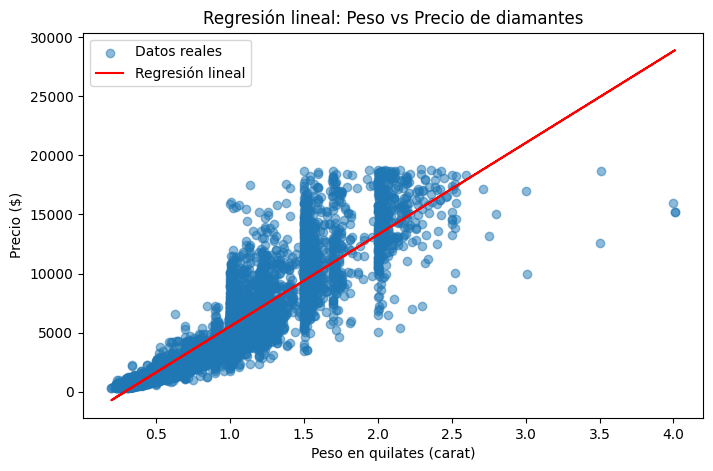

Para un diamante de 1.5 quilates, el precio estimado es de $9391.45


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [234]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Cargar el dataset de Seaborn
diamonds = sns.load_dataset("diamonds")

# Seleccionar las columnas de interés
df = diamonds[['carat', 'price']]

# Dividir en variables predictoras y objetivo
X = df[['carat']]  # Peso en quilates
y = df['price']    # Precio del diamante

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f} dólares")
print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# Visualizar la regresión
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", label="Regresión lineal")
plt.xlabel("Peso en quilates (carat)")
plt.ylabel("Precio ($)")
plt.title("Regresión lineal: Peso vs Precio de diamantes")
plt.legend()
plt.show()

# Función para predecir precio según el peso en quilates
def predecir_precio(peso_carat):
    prediccion = modelo.predict([[peso_carat]])
    return prediccion[0]

# Ejemplo de predicción
peso_ejemplo = 1.5  # Quilates
precio_predicho = predecir_precio(peso_ejemplo)
print(f"Para un diamante de {peso_ejemplo} quilates, el precio estimado es de ${precio_predicho:.2f}")


### 6. Dataset ficticio VIVIENDAS (Adecuado)

- 🔍 Objetivo: Predecir el peso de las viviendas en función de su superficie
- 🧠 Ejemplo de regresión simple: A mayor superficie, mayor precio de la vivienda.

Error MAE: 7387.15 (puntos de progresión)
R²: 0.85
RMSE: 9342.64
MAPE: 5.24%
                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     621.8
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           6.58e-39
Time:                        20:35:44   Log-Likelihood:                -845.52
No. Observations:                  80   AIC:                             1695.
Df Residuals:                      78   BIC:                             1700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

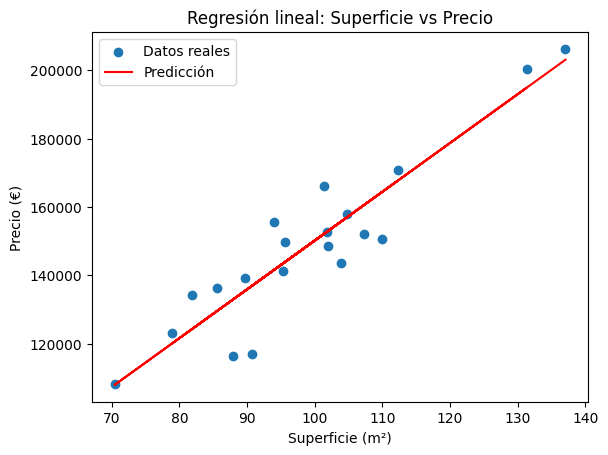

Precio estimado para 50.0 m²: 78683.14 €


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [235]:
# Generar datos sintéticos
np.random.seed(42)
superficie = np.random.normal(100, 20, 100)  # Metros cuadrados
precio = superficie * 1500 + np.random.normal(0, 10000, 100)  # Relación con ruido

df = pd.DataFrame({'superficie': superficie, 'precio': precio})

X = df[['superficie']]
y = df['precio']

# Dividir y entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")
# Calculamos el Coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

print(f"MAE: {mae:.2f} €")
print(f"R²: {r2:.2f}")

# Graficar
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio (€)")
plt.title("Regresión lineal: Superficie vs Precio")
plt.legend()
plt.show()

# Función para predecir precio según la superficie
def predecir_precio(superficie):
    superficie = np.array(superficie).reshape(-1, 1)  # Convertir a array 2D
    precio_predicho = modelo.predict(superficie)
    return precio_predicho[0]

# Ejemplo de uso
nueva_superficie = float(50)
precio_estimado = predecir_precio([[nueva_superficie]])
print(f"Precio estimado para {nueva_superficie} m²: {precio_estimado:.2f} €")

### 7. Dataset ficticio CONSUMO COMBUSTIBLE (Perfecto)

- 🔍 Objetivo: Predecir el consumo de combustible en función del tamaño del coche
- 🧠 Ejemplo de regresión simple: A mayor peso del coche, mayor consumo de combustible.

Error MAE: 0.30 (puntos de progresión)
R²: 1.00
RMSE: 0.40
MAPE: 0.44%
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.806e+06
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.87e-179
Time:                        20:35:44   Log-Likelihood:                -51.453
No. Observations:                  80   AIC:                             106.9
Df Residuals:                      78   BIC:                             111.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

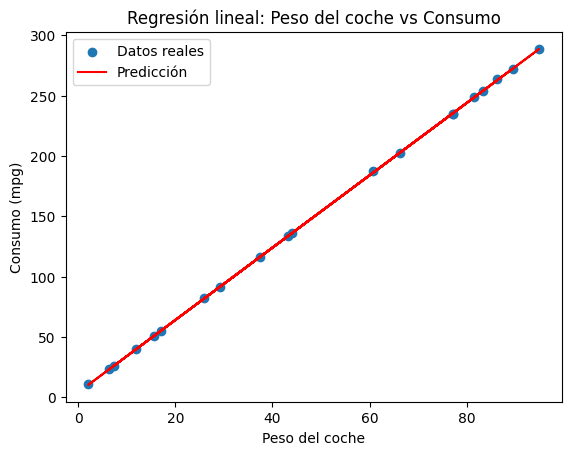

In [236]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(42)
X = np.random.rand(100, 1) * 100  # 100 datos de entrada entre 0 y 100
y = 3 * X.squeeze() + 4 + np.random.randn(100) * 0.5  # Relación casi perfecta con algo de ruido. X.squeeze(): Convierte la matriz de X en un array de una sola dimensión (para simplificar). Luego, X se multiplica por 3. Esto significa que el consumo (y) está altamente relacionado con el peso (X). Se suma 4 a cada valor, lo que actúa como un término de "intersección" en una ecuación de recta. Por último, se agrega un poco de ruido aleatorio con una distribución normal, para que los datos no sean perfectamente lineales (simulando variaciones reales en los datos).

# Convertir a DataFrame para consistencia con el ejemplo original
cars = pd.DataFrame({'weight': X.squeeze(), 'mpg': y})

# Dividir y entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")
# Calculamos el Coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

print(f"MAE: {mae:.2f} mpg")
print(f"R²: {r2:.2f}")

# Graficar
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.xlabel("Peso del coche")
plt.ylabel("Consumo (mpg)")
plt.title("Regresión lineal: Peso del coche vs Consumo")
plt.legend()
plt.show()